In [ ]:
!pip install pandas numpy matplotlib seaborn nltk textblob wordcloud scikit-learn tensorflow transformers

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Upload your dataset file
from google.colab import files
uploaded = files.upload()

Saving combined_sentiments.csv to combined_sentiments.csv


In [ ]:
# Load the dataset (replace 'your_dataset.csv' with your filename)
import io
df = pd.read_csv(io.BytesIO(uploaded['combined_sentiments.csv']))  # Adjust for JSON, Excel, etc.

# Display basic info
print(df.head())
print(df.info())
print(df.describe())

                                                Text  \
0                                         Hey there.   
1                              Welcome to Factually.   
2                                  I'm Adam Conover.   
3  Thanks for joining me again. You know, I've pl...   
4               I think they're one of the greatest.   

                                           Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
1  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
3  {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...   
4  {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...   

                                         Source_File  
0  The Video Game Industry is in Crisis with Jaso...  
1  The Video Game Industry is in Crisis with Jaso...  
2  The Video Game Industry is in Crisis with Jaso...  
3  The Video Game Industry is in Crisis with Jaso...  
4  The Video Game Industry is in Crisis with Jaso..

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Rejoin tokens
    clean_text = ' '.join(filtered_tokens)
    return clean_text

# Apply cleaning to your text column
df['cleaned_text'] = df['Text'].apply(clean_text)  # Changed 'text' to 'Text'

# Display cleaned text samples
print(df[['Text', 'cleaned_text']].head()) # Changed 'text' to 'Text'

                                                Text  \
0                                         Hey there.   
1                              Welcome to Factually.   
2                                  I'm Adam Conover.   
3  Thanks for joining me again. You know, I've pl...   
4               I think they're one of the greatest.   

                                        cleaned_text  
0                                                hey  
1                                  welcome factually  
2                                    im adam conover  
3  thanks joining know ive played video game enti...  
4                          think theyre one greatest  


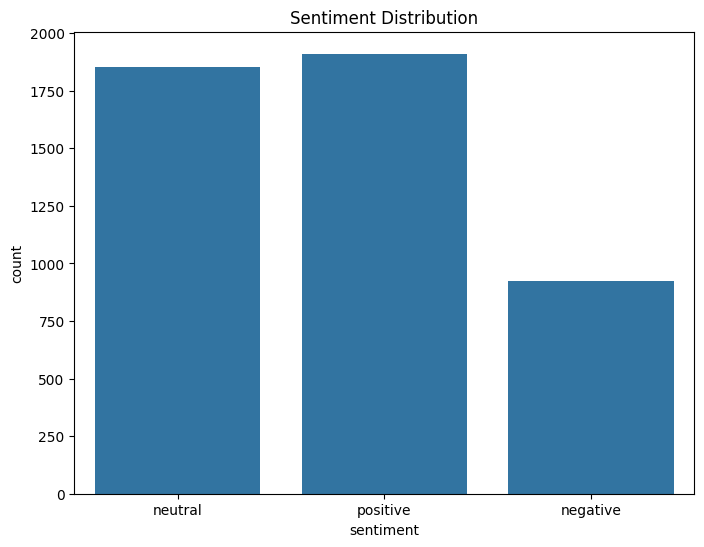

In [ ]:
# If your dataset doesn't have labels, we can use TextBlob for initial sentiment scoring
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis (skip if your dataset already has labels)
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# Convert text to numerical features
# Option 1: TF-IDF
#tfidf = TfidfVectorizer(max_features=5000)
#X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Option 2: Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
X = count_vec.fit_transform(df['cleaned_text']).toarray()

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Evaluation for Naive Bayes:
Accuracy: 0.6705756929637526
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.46      0.55       205
           1       0.87      0.59      0.70       363
           2       0.58      0.86      0.69       370

    accuracy                           0.67       938
   macro avg       0.71      0.64      0.65       938
weighted avg       0.71      0.67      0.67       938



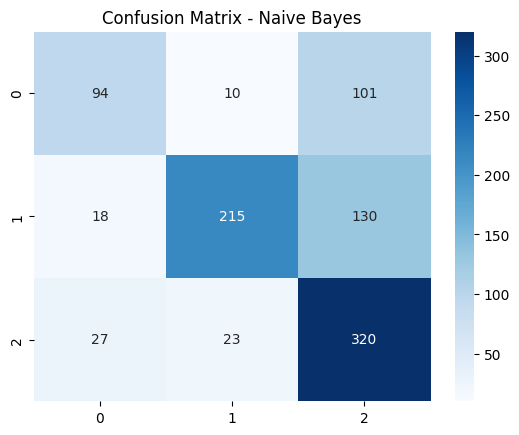

Evaluation for Logistic Regression:
Accuracy: 0.8742004264392325
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       205
           1       0.85      0.98      0.91       363
           2       0.91      0.83      0.87       370

    accuracy                           0.87       938
   macro avg       0.88      0.86      0.86       938
weighted avg       0.88      0.87      0.87       938



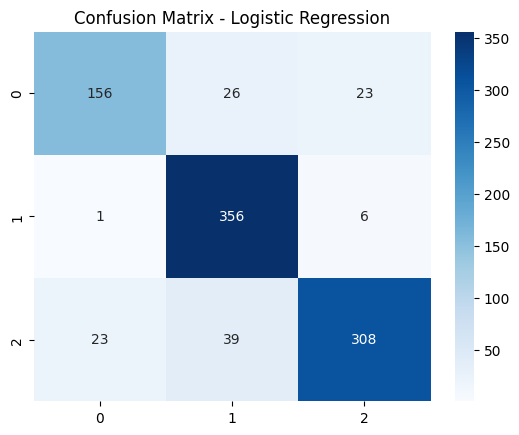

Evaluation for Random Forest:
Accuracy: 0.8400852878464818
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.59      0.71       205
           1       0.83      0.98      0.90       363
           2       0.83      0.85      0.84       370

    accuracy                           0.84       938
   macro avg       0.85      0.80      0.81       938
weighted avg       0.84      0.84      0.83       938



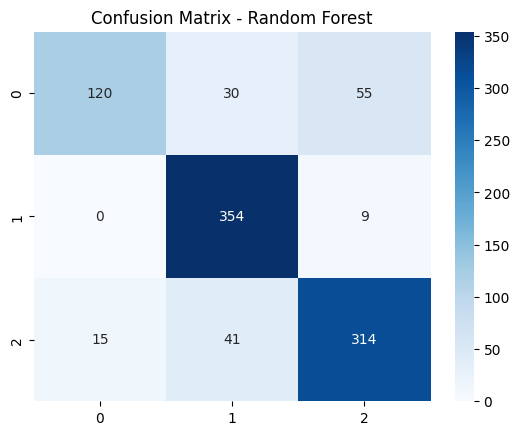

In [ ]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5793 - loss: 0.9985 - val_accuracy: 0.5874 - val_loss: 0.9573
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6007 - loss: 0.9397 - val_accuracy: 0.5874 - val_loss: 0.9587
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6175 - loss: 0.9257 - val_accuracy: 0.5874 - val_loss: 0.9569
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6134 - loss: 0.9369 - val_accuracy: 0.5874 - val_loss: 0.9599
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5981 - loss: 0.9429 - val_accuracy: 0.5874 - val_loss: 0.9558
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6039 - loss: 0.9343 - val_accuracy: 0.5874 - val_loss: 0.9591
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5916 - loss: 0.9468 - val_accuracy: 0.5874 - val_loss: 0.9654
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6072 - loss: 0.9358 - val_accuracy: 0.5874 - val_

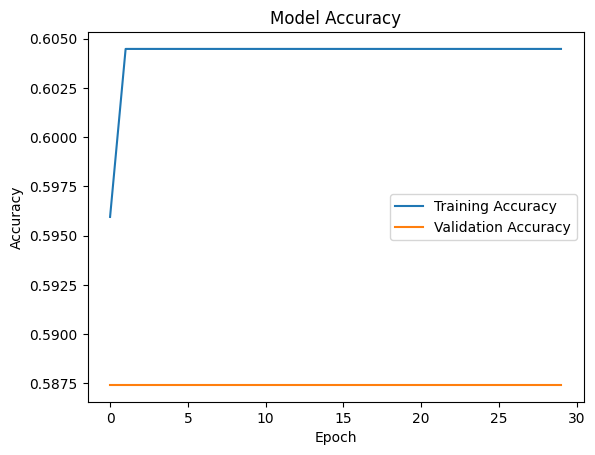

30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step
Evaluation for LSTM:
Accuracy: 0.5874200426439232
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.00      0.00      0.00       235
           2       0.59      1.00      0.74       551

    accuracy                           0.59       938
   macro avg       0.20      0.33      0.25       938
weighted avg       0.35      0.59      0.43       938



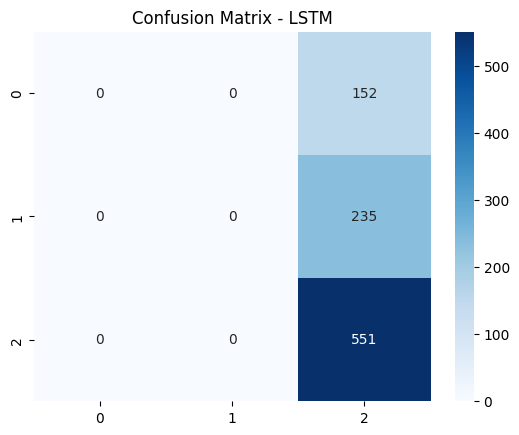

In [ ]:
# Tokenization for LSTM
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])
word_index = tokenizer.word_index

# Convert text to sequences and pad
X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])
X_pad = pad_sequences(X_seq, maxlen=500, padding='post', truncating='post')

# Split for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 for positive, neutral, negative

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train LSTM
history = model.fit(X_train_lstm, y_train_lstm,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_test_lstm, y_test_lstm))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate LSTM
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
evaluate_model(y_test_lstm, y_pred_lstm, "LSTM")

In [ ]:
import joblib
import pickle

# Save TF-IDF and models
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(nb, 'naive_bayes_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')

# Save tokenizer and LSTM model
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model.save('lstm_sentiment_model.h5')

# Download the files to your local machine
files.download('tfidf_vectorizer.pkl')
files.download('naive_bayes_model.pkl')
files.download('logistic_regression_model.pkl')
files.download('random_forest_model.pkl')
files.download('tokenizer.pickle')
files.download('lstm_sentiment_model.h5')